In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import pickle

from tqdm import tqdm
import os




In [2]:
import pandas

In [3]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [5]:
data  = pd.read_csv('preprocessed_data.csv', nrows=10000)
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [6]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [8]:
ex = ["classroom students should take break",
"low income homes students receive free breakfast",
"students will receive low grades"]
vectorizer = CountVectorizer()
vectorizer.fit(ex)
print(vectorizer.transform(ex).toarray())
print(vectorizer.get_feature_names())

[[1 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 1]]
['break', 'breakfast', 'classroom', 'free', 'grades', 'homes', 'income', 'low', 'receive', 'should', 'students', 'take', 'will']


In [9]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_bow = vectorizer.transform(X_train['essay'].values)
x_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
x_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)

(4489, 8) (4489,)
(2211, 8) (2211,)
(3300, 8) (3300,)
After vectorizations
(4489, 10000) (4489,)
(2211, 10000) (2211,)
(3300, 10000) (3300,)


In [10]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
x_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
x_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_cv_essay_tfidf.shape, y_cv.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(4489, 8) (4489,)
(2211, 8) (2211,)
(3300, 8) (3300,)
After vectorizations
(4489, 13718) (4489,)
(2211, 13718) (2211,)
(3300, 13718) (3300,)


In [11]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


Loading Glove Model


1917495it [11:47, 2710.19it/s]


Done. 1917495  words loaded!


In [12]:
words = []
data_essay=data['essay']
for i in data_essay:
    words.extend(i.split(' '))

#for i in preproced_titles:
#    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

all the words in the coupus 1557755
the unique words in the coupus 22692
The number of words that are present in both glove vectors and our coupus 21796 ( 96.051 %)
word 2 vec length 21796


In [13]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [14]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm( X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_train_essay.append(vector)

print(len(avg_w2v_vectors_X_train_essay))
print(len(avg_w2v_vectors_X_train_essay[0]))

100%|██████████████████████████████████████| 4489/4489 [01:12<00:00, 62.26it/s]


4489
300


In [15]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_test_essay.append(vector)

print(len(avg_w2v_vectors_X_test_essay))
print(len(avg_w2v_vectors_X_test_essay[0]))

100%|█████████████████████████████████████| 3300/3300 [00:03<00:00, 969.15it/s]


3300
300


In [16]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_cv_essay.append(vector)

print(len(avg_w2v_vectors_X_cv_essay))
print(len(avg_w2v_vectors_X_cv_essay[0]))

100%|████████████████████████████████████| 2211/2211 [00:01<00:00, 1484.27it/s]


2211
300


In [17]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [18]:
tfidf_w2v_vectors_X_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_essay.append(vector)

print(len(tfidf_w2v_vectors_X_train_essay))
print(len(tfidf_w2v_vectors_X_train_essay[0]))

100%|█████████████████████████████████████| 4489/4489 [00:20<00:00, 214.05it/s]


4489
300


In [19]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [20]:
tfidf_w2v_vectors_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_essay.append(vector)

print(len(tfidf_w2v_vectors_X_test_essay))
print(len(tfidf_w2v_vectors_X_test_essay[0]))

100%|█████████████████████████████████████| 3300/3300 [00:15<00:00, 213.17it/s]


3300
300


In [21]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [22]:
tfidf_w2v_vectors_X_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_cv_essay.append(vector)

print(len(tfidf_w2v_vectors_X_cv_essay))
print(len(tfidf_w2v_vectors_X_cv_essay[0]))

100%|█████████████████████████████████████| 2211/2211 [00:10<00:00, 210.60it/s]


2211
300


In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [24]:
ex = ["classroom students should take break",
"low income homes students receive free breakfast",
"students will receive low grades"]
vectorizer = CountVectorizer()
vectorizer.fit(ex)
print(vectorizer.transform(ex).toarray())
print(vectorizer.get_feature_names())

[[1 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 1]]
['break', 'breakfast', 'classroom', 'free', 'grades', 'homes', 'income', 'low', 'receive', 'should', 'students', 'take', 'will']


In [25]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
#X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
#X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
#X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

#print("After vectorizations")
#print(X_train_title_bow.shape, y_train.shape)
#print(X_cv_title_bow.shape, y_cv.shape)
#print(X_test_title_bow.shape, y_test.shape)
#print("="*100)

(4489, 8) (4489,)
(2211, 8) (2211,)
(3300, 8) (3300,)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
#X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
#X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
#X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

#print("After vectorizations")
#print(X_train_title_tfidf.shape, y_train.shape)
#print(X_cv_title_tfidf.shape, y_cv.shape)
#print(X_test_title_tfidf.shape, y_test.shape)
#print("="*100)

(4489, 8) (4489,)
(2211, 8) (2211,)
(3300, 8) (3300,)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [27]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
x_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
x_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(4489, 51) (4489,)
(2211, 51) (2211,)
(3300, 51) (3300,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [28]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_cv_teacher_ohe.shape, y_cv.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(4489, 5) (4489,)
(2211, 5) (2211,)
(3300, 5) (3300,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
x_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_cv_grade_ohe.shape, y_cv.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(4489, 4) (4489,)
(2211, 4) (2211,)
(3300, 4) (3300,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [30]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

x_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
x_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_cv_price_norm.shape, y_cv.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(4489, 1) (4489,)
(2211, 1) (2211,)
(3300, 1) (3300,)


In [31]:
from scipy.sparse import hstack
x_tr1 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_train_essay_bow)).tocsr()
x_cv1 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,x_cv_essay_bow)).tocsr()
x_te1 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,x_test_essay_bow)).tocsr()

print("Final Data matrix")
print(x_tr1.shape, y_train.shape)
print(x_cv1.shape, y_cv.shape)
print(x_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(4489, 10061) (4489,)
(2211, 10061) (2211,)
(3300, 10061) (3300,)


In [32]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|████████████████████████████████████████████| 5/5 [04:04<00:00, 53.83s/it]


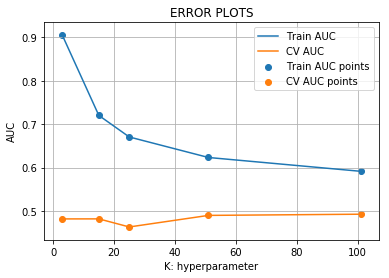

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(x_tr1, y_train)

    y_train_pred = batch_predict(neigh, x_tr1)    
    y_cv_pred = batch_predict(neigh, x_cv1)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

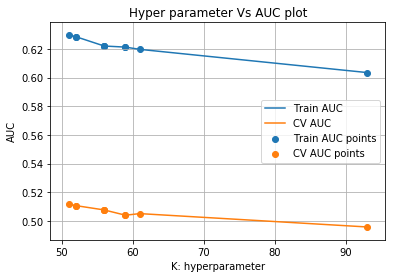

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.0156,1.123916e-07,3.187605,0.007354,51,{'n_neighbors': 51},0.489447,0.543093,0.502149,0.511567,0.022894,1,0.595888,0.626079,0.666778,0.629582,0.029047
3,0.0260,7.353838e-03,3.172006,0.019457,52,{'n_neighbors': 52},0.487872,0.544458,0.499552,0.510632,0.024397,2,0.593400,0.625492,0.666691,0.628528,0.029998
8,0.0260,7.354119e-03,3.130406,0.019457,52,{'n_neighbors': 52},0.487872,0.544458,0.499552,0.510632,0.024397,2,0.593400,0.625492,0.666691,0.628528,0.029998
2,0.0208,7.354007e-03,3.213606,0.012737,56,{'n_neighbors': 56},0.488582,0.536953,0.497262,0.507604,0.021060,4,0.588623,0.614492,0.662890,0.622002,0.030781
5,0.0156,0.000000e+00,3.156405,0.044732,56,{'n_neighbors': 56},0.488582,0.536953,0.497262,0.507604,0.021060,4,0.588623,0.614492,0.662890,0.622002,0.030781


In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':sp_randint(50, 100)}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(x_tr1, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

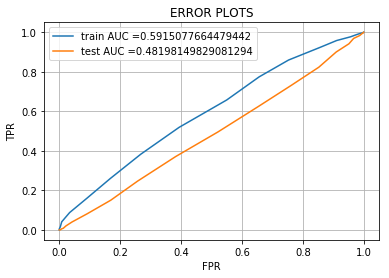

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_k=101
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=1)
neigh.fit(x_tr1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, x_tr1)    
y_test_pred = batch_predict(neigh, x_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [36]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [37]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3145899165409083 for threshold 0.871
Train confusion matrix
[[ 376  244]
 [1862 2007]]
Test confusion matrix
[[ 218  237]
 [1436 1409]]


In [38]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#def pr_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
#    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
#    fig = plt.figure(figsize=figsize)
#    try:
#        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
#    except ValueError:
#        raise ValueError("Confusion matrix values must be integers.")
#    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
#    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
#    plt.ylabel('True label')
#    plt.xlabel('Predicted label')
#    return fig
#print("Test confusion matrix")
#print(pr_confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

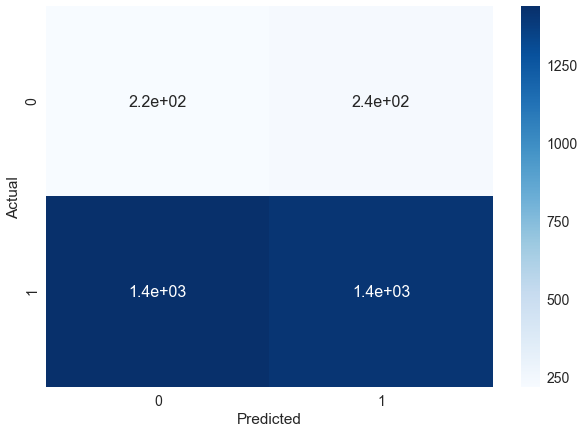

In [39]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [40]:
from scipy.sparse import hstack
x_tr2 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_train_essay_tfidf)).tocsr()
x_cv2 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,x_cv_essay_tfidf)).tocsr()
x_te2 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,x_test_essay_tfidf)).tocsr()

print("Final Data matrix")
print(x_tr2.shape, y_train.shape)
print(x_cv2.shape, y_cv.shape)
print(x_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(4489, 13779) (4489,)
(2211, 13779) (2211,)
(3300, 13779) (3300,)


100%|████████████████████████████████████████████| 5/5 [02:02<00:00, 24.47s/it]


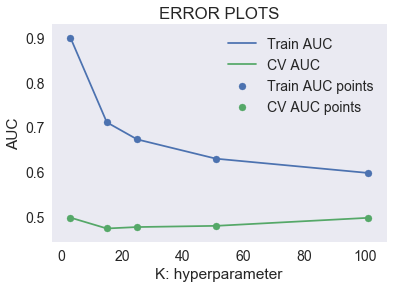

In [41]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(x_tr2, y_train)

    y_train_pred = batch_predict(neigh, x_tr2)    
    y_cv_pred = batch_predict(neigh, x_cv2)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

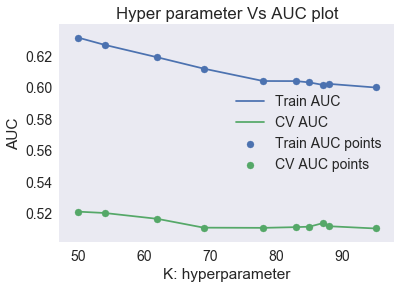

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.040268,2.469048e-02,3.115074,0.070530,50,{'n_neighbors': 50},0.515092,0.534150,0.513192,0.520815,0.009464,1,0.636227,0.631273,0.626270,0.631257,0.004065
8,0.020800,7.353895e-03,4.112008,1.502194,54,{'n_neighbors': 54},0.521805,0.534256,0.503822,0.519968,0.012491,2,0.627925,0.630599,0.621496,0.626673,0.003820
9,0.026000,7.353895e-03,3.125206,0.057436,62,{'n_neighbors': 62},0.512912,0.534917,0.500896,0.516249,0.014087,3,0.619357,0.622174,0.614720,0.618750,0.003073
4,0.015600,1.123916e-07,3.120006,0.033700,69,{'n_neighbors': 69},0.505243,0.524978,0.501729,0.510654,0.010233,8,0.615788,0.609316,0.609643,0.611582,0.002977
3,0.026000,7.353895e-03,3.198006,0.050950,78,{'n_neighbors': 78},0.504492,0.519655,0.507451,0.510534,0.006564,9,0.609395,0.596447,0.605303,0.603715,0.005404


In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':sp_randint(50, 100)}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(x_tr2, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

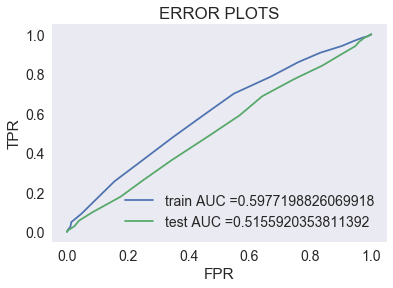

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(x_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, x_tr2)    
y_test_pred = batch_predict(neigh, x_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [44]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.32571557208247526 for threshold 0.861
Train confusion matrix
[[ 340  280]
 [1571 2298]]
Test confusion matrix
[[ 197  258]
 [1168 1677]]


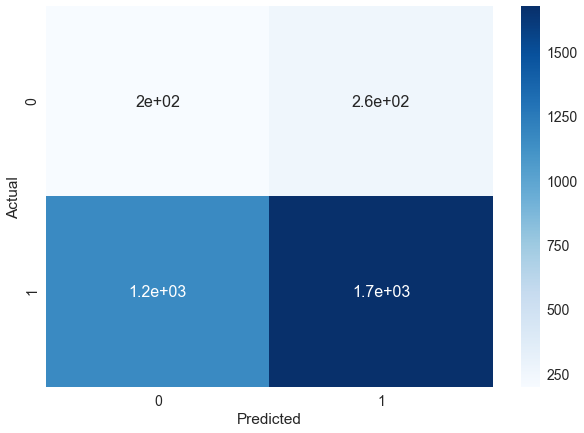

In [45]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [46]:
from scipy.sparse import hstack
x_tr3 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,avg_w2v_vectors_X_train_essay)).tocsr()
x_cv3 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,avg_w2v_vectors_X_cv_essay)).tocsr()
x_te3 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,avg_w2v_vectors_X_test_essay)).tocsr()

print("Final Data matrix")
print(x_tr3.shape, y_train.shape)
print(x_cv3.shape, y_cv.shape)
print(x_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(4489, 361) (4489,)
(2211, 361) (2211,)
(3300, 361) (3300,)


100%|████████████████████████████████████████████| 5/5 [03:56<00:00, 47.38s/it]


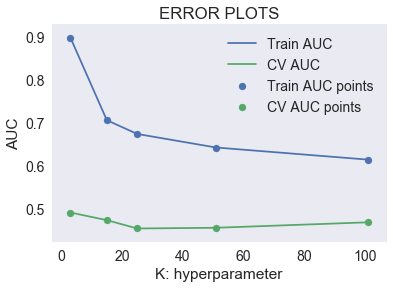

In [47]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(x_tr3, y_train)

    y_train_pred = batch_predict(neigh, x_tr3)    
    y_cv_pred = batch_predict(neigh, x_cv3)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

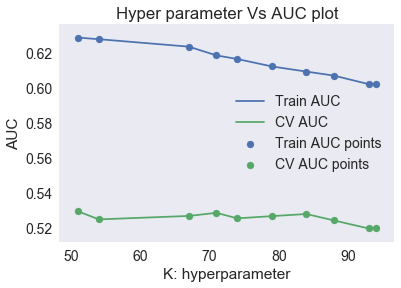

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,0.0364,7.353951e-03,16.499629,5.950987,51,{'n_neighbors': 51},0.532656,0.507256,0.547408,0.529098,0.016582,1,0.640413,0.622211,0.622466,0.628363,0.008521
7,0.0312,1.123916e-07,6.708012,0.063687,54,{'n_neighbors': 54},0.529216,0.499088,0.545312,0.524530,0.019158,7,0.637735,0.619579,0.625071,0.627461,0.007603
1,0.0416,7.354007e-03,7.043357,0.573563,67,{'n_neighbors': 67},0.528478,0.513635,0.537402,0.526500,0.009802,4,0.642918,0.606578,0.620129,0.623208,0.014995
9,0.0364,7.353895e-03,17.815231,3.362014,71,{'n_neighbors': 71},0.537750,0.515880,0.531207,0.528278,0.009167,2,0.639533,0.598943,0.616125,0.618200,0.016636
8,0.0364,7.353895e-03,16.265628,7.268478,74,{'n_neighbors': 74},0.535142,0.517844,0.522381,0.525124,0.007324,6,0.632383,0.598426,0.617680,0.616163,0.013904


In [48]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':sp_randint(50, 100)}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(x_tr3, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

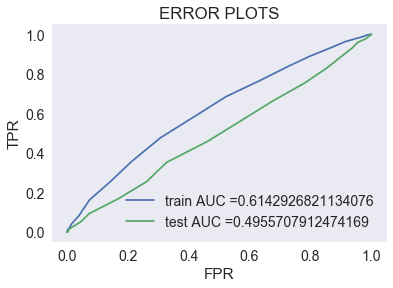

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(x_tr3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, x_tr3)    
y_test_pred = batch_predict(neigh, x_te3)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [50]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.33875803533462845 for threshold 0.861
Train confusion matrix
[[ 353  267]
 [1567 2302]]
Test confusion matrix
[[ 192  263]
 [1228 1617]]


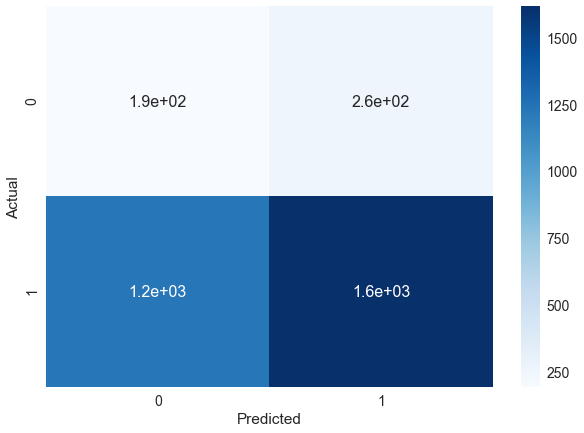

In [51]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [52]:
x_tr4 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,tfidf_w2v_vectors_X_train_essay)).tocsr()
x_cv4 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,np.array(tfidf_w2v_vectors_X_cv_essay))).tocsr()
x_te4 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,tfidf_w2v_vectors_X_test_essay)).tocsr()

print("Final Data matrix")
print(x_tr4.shape, y_train.shape)
print(x_cv4.shape, y_cv.shape)
print(x_te4.shape, y_test.shape)
print("="*100)

Final Data matrix
(4489, 361) (4489,)
(2211, 361) (2211,)
(3300, 361) (3300,)


100%|████████████████████████████████████████████| 5/5 [04:04<00:00, 49.12s/it]


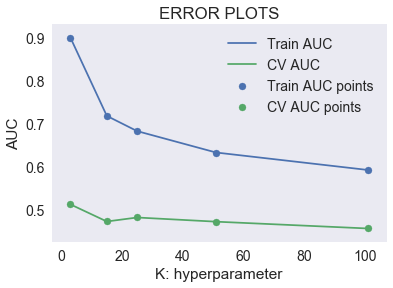

In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(x_tr4, y_train)

    y_train_pred = batch_predict(neigh, x_tr4)    
    y_cv_pred = batch_predict(neigh, x_cv4)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

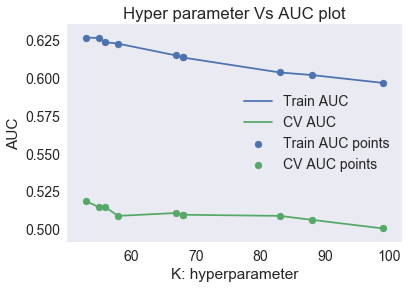

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.0312,1.123916e-07,6.588745,0.019903,53,{'n_neighbors': 53},0.499802,0.517045,0.537496,0.518106,0.015405,1,0.635711,0.615416,0.628625,0.626584,0.008410
2,0.0312,1.123916e-07,6.671612,0.109818,55,{'n_neighbors': 55},0.494047,0.511032,0.537635,0.514228,0.017936,2,0.635795,0.614304,0.629040,0.626380,0.008973
8,0.0312,1.123916e-07,6.645612,0.079545,56,{'n_neighbors': 56},0.493091,0.512529,0.536958,0.514182,0.017945,3,0.634196,0.610557,0.625982,0.623578,0.009799
4,0.0312,1.123916e-07,6.593612,0.044732,58,{'n_neighbors': 58},0.486438,0.508276,0.530360,0.508348,0.017929,7,0.630695,0.610718,0.626362,0.622592,0.008580
5,0.0312,0.000000e+00,6.567612,0.050950,67,{'n_neighbors': 67},0.498633,0.507482,0.524688,0.510261,0.010816,4,0.626458,0.596066,0.621688,0.614738,0.013345


In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':sp_randint(50, 100)}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(x_tr4, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

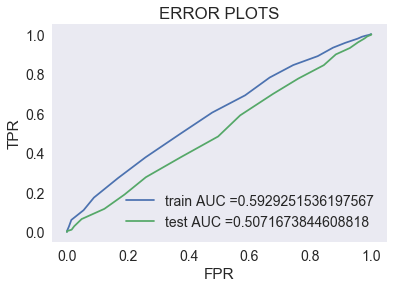

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(x_tr4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, x_tr4)    
y_test_pred = batch_predict(neigh, x_te4)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [56]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.31565545819124724 for threshold 0.861
Train confusion matrix
[[ 324  296]
 [1532 2337]]
Test confusion matrix
[[ 196  259]
 [1167 1678]]


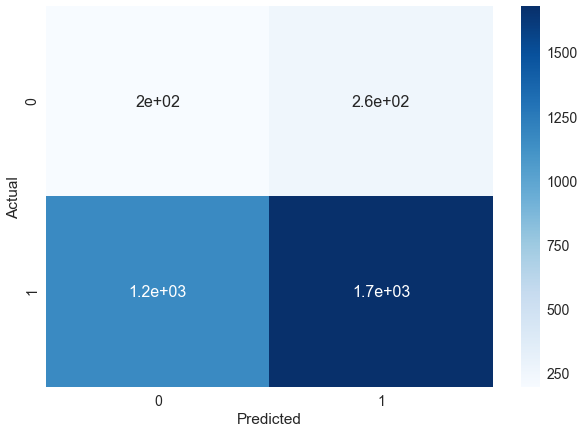

In [57]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [58]:
#from sklearn.dataset import load_digits
from sklearn.feature_selection import SelectKBest, chi2
best_feature = SelectKBest(chi2,k = 2000)
best_feature.fit(x_train_essay_tfidf, y_train)
# selecting the best 2000 features for train, test and cross validation
x_tfidf_train_essay_new = best_feature.transform(x_train_essay_tfidf)
x_tfidf_cv_essay_new = best_feature.transform(x_cv_essay_tfidf)
x_tfidf_test_essay_new = best_feature.transform(x_test_essay_tfidf)

In [59]:
from scipy.sparse import hstack
x_tr2 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_tfidf_train_essay_new)).tocsr()
x_cv2 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,x_tfidf_cv_essay_new)).tocsr()
x_te2 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,x_tfidf_test_essay_new)).tocsr()

print("Final Data matrix")
print(x_tr2.shape, y_train.shape)
print(x_cv2.shape, y_cv.shape)
print(x_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(4489, 2061) (4489,)
(2211, 2061) (2211,)
(3300, 2061) (3300,)


100%|████████████████████████████████████████████| 5/5 [01:51<00:00, 22.41s/it]


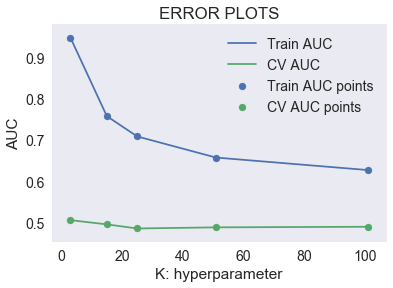

In [60]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(x_tr2, y_train)

    y_train_pred = batch_predict(neigh, x_tr2)    
    y_cv_pred = batch_predict(neigh, x_cv2)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

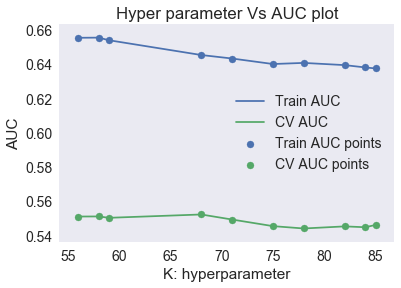

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.0000,0.000000,2.854805,0.063687,56,{'n_neighbors': 56},0.561454,0.571250,0.519830,0.550858,0.022288,3,0.668010,0.644433,0.653623,0.655355,0.009703
1,0.0052,0.007354,2.880805,0.014708,58,{'n_neighbors': 58},0.556917,0.573514,0.522274,0.550914,0.021343,2,0.668951,0.643512,0.653877,0.655446,0.010445
7,0.0000,0.000000,2.880805,0.014708,59,{'n_neighbors': 59},0.557924,0.574243,0.518137,0.550116,0.023559,4,0.665561,0.642620,0.653572,0.653918,0.009369
8,0.0052,0.007354,2.917538,0.076833,68,{'n_neighbors': 68},0.555677,0.579841,0.520630,0.552064,0.024305,1,0.654484,0.634657,0.646704,0.645281,0.008157
2,0.0052,0.007354,2.860005,0.014708,71,{'n_neighbors': 71},0.549167,0.577656,0.520496,0.549119,0.023333,5,0.653247,0.632070,0.644407,0.643242,0.008685


In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':sp_randint(50, 100)}
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(x_tr2, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

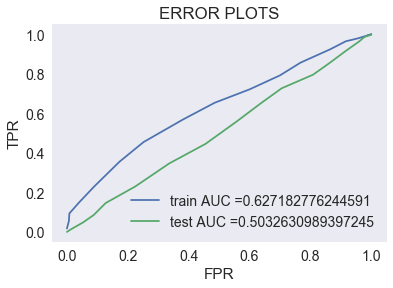

In [62]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(x_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, x_tr2)    
y_test_pred = batch_predict(neigh, x_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [63]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3518588615879739 for threshold 0.931
Train confusion matrix
[[ 384  236]
 [1671 2198]]
Test confusion matrix
[[ 202  253]
 [1261 1584]]


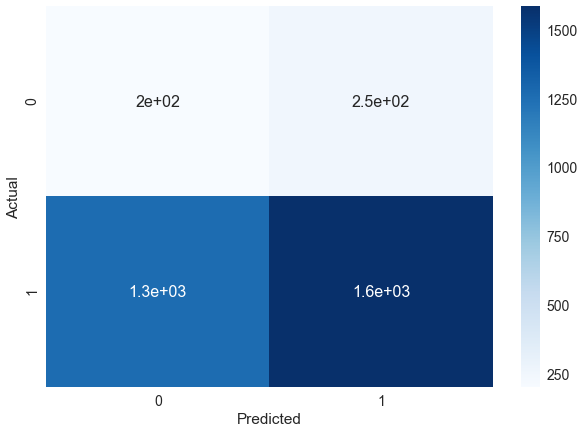

In [64]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [65]:
from prettytable import PrettyTable as pt
x=pt()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]
x.add_row(["BOW","Brute",100,0.48])
x.add_row(["TFIDF","Brute",100,0.55])
x.add_row(["W2V","Brute",100,0.52])
x.add_row(["TFIDFW2V","Brute",100,0.52])
print(x)

+------------+-------+-----------------+------+
| Vectorizer | Model | Hyper Parameter | AUC  |
+------------+-------+-----------------+------+
|    BOW     | Brute |       100       | 0.48 |
|   TFIDF    | Brute |       100       | 0.55 |
|    W2V     | Brute |       100       | 0.52 |
|  TFIDFW2V  | Brute |       100       | 0.52 |
+------------+-------+-----------------+------+
